In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
org_df=df.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


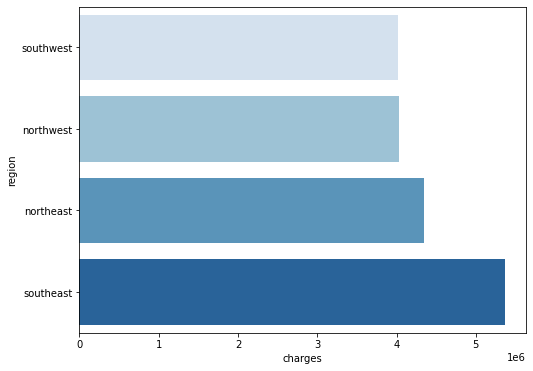

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges, charges.index, palette='Blues')

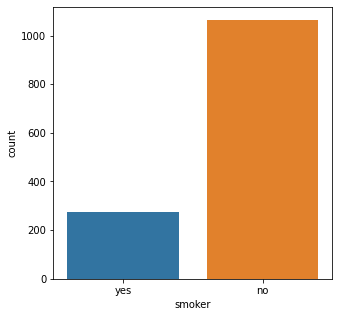

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)

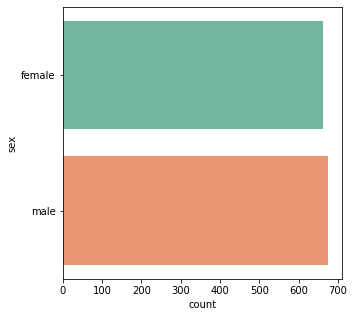

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y='sex',data=df,palette="Set2")

In [ ]:
print("**CENTRAL TENDENCY**")
print("mean of the dataset:\n",df.mean())
print("median of the dataset:\n",df.median())
print("std of the dataset:\n",df.std())

**CENTRAL TENDENCY**
mean of the dataset:
 age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64
median of the dataset:
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64
std of the dataset:
 age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64


In [ ]:
cols = list(df.columns)
cols.remove('region')
cols.remove('sex')
cols.remove('smoker')

for col in cols:
  col_zscore = col + '_zscore'
  df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_zscore,bmi_zscore,children_zscore,charges_zscore
0,19,female,27.900,0,yes,southwest,16884.92400,-1.438764,-0.453320,-0.908614,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-1.509965,0.509621,-0.078767,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.797954,0.383307,1.580926,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,-0.441948,-1.305531,-0.908614,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.513149,-0.292556,-0.908614,-0.776802


In [ ]:
def normalize_data(df):
    # df on input should contain only one column 
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

df['norm-age'] = normalize_data(df['age'])
df['norm-bmi'] = normalize_data(df['bmi'])
df['norm-chidren'] = normalize_data(df['children'])
df['norm-charges'] = normalize_data(df['charges'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_zscore,bmi_zscore,children_zscore,charges_zscore,norm-age,norm-bmi,norm-chidren,norm-charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.438764,-0.453320,-0.908614,0.298584,0.021739,0.321227,0.0,0.251611
1,18,male,33.770,1,no,southeast,1725.55230,-1.509965,0.509621,-0.078767,-0.953689,0.000000,0.479150,0.2,0.009636
2,28,male,33.000,3,no,southeast,4449.46200,-0.797954,0.383307,1.580926,-0.728675,0.217391,0.458434,0.6,0.053115
3,33,male,22.705,0,no,northwest,21984.47061,-0.441948,-1.305531,-0.908614,0.719843,0.326087,0.181464,0.0,0.333010
4,32,male,28.880,0,no,northwest,3866.85520,-0.513149,-0.292556,-0.908614,-0.776802,0.304348,0.347592,0.0,0.043816


**CORRELATION BETWEEN THE FEATURES**

In [ ]:
##Converting objects labels into categorical
org_df[['sex', 'smoker', 'region']] = org_df[['sex', 'smoker', 'region']].astype('category')
org_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(org_df.sex.drop_duplicates())
org_df.sex = label.transform(org_df.sex)
label.fit(df.smoker.drop_duplicates())
org_df.smoker = label.transform(org_df.smoker)
label.fit(org_df.region.drop_duplicates())
org_df.region = label.transform(org_df.region)
org_df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


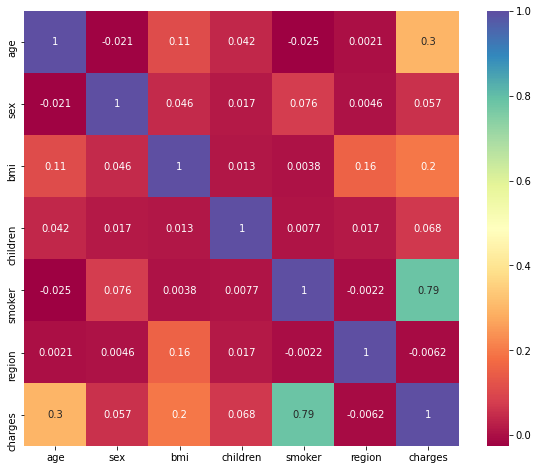

In [ ]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = org_df.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="Spectral",
            square=True, ax=ax,annot=True)

# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = org_df.drop(['charges'], axis = 1)
print("INDEPENDENT VARIABLE \n",x.head())
y = org_df.charges
print("DEPENDENT VARIABLE \n",y.head())

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
y=lr.score(x_test,y_test)

a=print("ACCURACY SCORE:",lr.score(x_test,y_test))
print(y_train_pred[:5])

INDEPENDENT VARIABLE 
    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1
DEPENDENT VARIABLE 
 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
ACCURACY SCORE: 0.7962732059725786
[ 6077.79800668 11137.96930416   872.03598826 24554.01650168
  2089.2583988 ]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
print("MSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R-squared value:",round(r2_score(y_train, y_train_pred),3))
print("Mean absolute error:",mean_absolute_error(y_train, y_train_pred))

MSE: 6168.476538503496
R-squared value: 0.734
Mean absolute error: 4232.221185900429


# Support vector machine

In [ ]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 172823385.387404
RMSE : 13146.230843378797
r2 score : -0.09774777032029891


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 23121261.732218865
RMSE : 4808.457313132651
r2 score : 0.8501082200179043


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 43690299.91491
RMSE : 6609.86383482368
r2 score : 0.7167621344352562
